# In this notebook we will explore two algorithms which are based on "ensemble" of decision trees.
1. [Random forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
> We take the average of several decision trees since only one tree is susceptible to overfitting while multiple decision trees tend to be stable and provide better generalization.
2. [Gradient boosted decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
>This model also uses several decision trees but each tree is shallow and is built sequencially so that it attempts to correct the mistakes of the previous trees. 

Both the models are not as prone to overfitting as a single decision tree but lose the ability to provide easy interpretation to the decision making process. They are also expensive to train. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import warnings

warnings.filterwarnings('ignore')

df_AIMD = pd.read_csv("Dist_AIMD.csv") 
df_MD = pd.read_csv('Dist_MD.csv')
df_fin = pd.concat([df_AIMD, df_MD])

df_shuffle = shuffle(df_fin, random_state=0)

from sklearn.model_selection import train_test_split

# Data selection 
# First we shall select the closest oxygens and later add the rest to see the effects of increasing features
# Then we will repeat it for hydrogens
X3 = df_shuffle[['S-O1', 'C-O1', 'N-O1']]
X6 = df_shuffle[['S-O1', 'C-O1', 'N-O1', 'S-O2', 'C-O2', 'N-O2']]

H3 = df_shuffle[['S-H1', 'C-H1', 'N-H1']]
H6 = df_shuffle[['S-H1', 'C-H1', 'N-H1', 'S-H2', 'C-H2', 'N-H2']]
y = df_shuffle['Class']

# Splitting the data into training(80%) and test(20%) set

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.20, random_state=0)

## Random Forests model

Like decision trees, these models don't usually require pre-processing of features and are not tripped up by correlated features. There are several parameters to consider here, 
1. n_estimators : Number of trees to use in the ensemble (More trees are better but increse the computation cost)
2. max_features: Number of features to look for when considering a split (Has a strong influence on performance)
3. max_depth: Controls depth of each tree
4. min_samples_split: Minimun number of samples required to split a node into branches
5. n_jobs: How many cores to use in parallel during training. 

The defaults can be seen in the link provided above or the python help function.

Number of features seen in the fit:  3
Feature names and weights:
 [('C-O1', 0.4113612793241846), ('N-O1', 0.32601784344563267), ('S-O1', 0.2626208772301828)]
Training accuracy for RandomForest with default values for 3 features:  1.0
Test accuracy for RandomForest with default values for 3 features:  0.8452380952380952

Number of features seen in the fit:  6
Feature names and weights:
 [('N-O2', 0.30538310509826117), ('C-O2', 0.2944845341125069), ('C-O1', 0.148929255573231), ('N-O1', 0.10684315903138546), ('S-O1', 0.08005310923556266), ('S-O2', 0.06430683694905265)]
Training accuracy for RandomForest with default values for 6 features:  1.0
Test accuracy for RandomForest with default values for 6 features:  0.9523809523809523


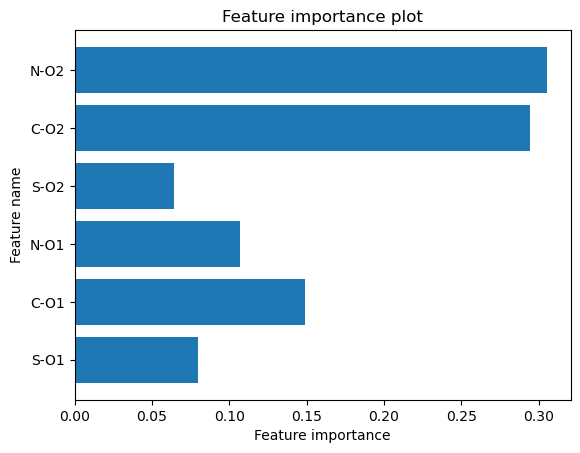

In [2]:
from sklearn.ensemble import RandomForestClassifier
import my_utils

# RandomForest classifier, default values
rf = RandomForestClassifier(random_state=0)

# 3 features
rf.fit(X3_train, y3_train)

print("Number of features seen in the fit: ",rf.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(rf.feature_names_in_,rf.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RandomForest with default values for 3 features: ", rf.score(X3_train, y3_train))
print("Test accuracy for RandomForest with default values for 3 features: ", rf.score(X3_test, y3_test))

# 6 features

rf.fit(X6_train, y6_train)

print("\nNumber of features seen in the fit: ",rf.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(rf.feature_names_in_,rf.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RandomForest with default values for 6 features: ", rf.score(X6_train, y6_train))
print("Test accuracy for RandomForest with default values for 6 features: ", rf.score(X6_test, y6_test))

my_utils.plot_feature_importance(rf, rf.feature_names_in_)


### From the training score we can see that the model is overfitted, next let us prune the trees and adjust some parameters  

Number of features seen in the fit:  3
Feature names and weights:
 [('C-O1', 0.4893983433347711), ('N-O1', 0.2716469370231648), ('S-O1', 0.2389547196420641)]
Training accuracy for RandomForest for 3 features:  0.8828828828828829
Test accuracy for RandomForest for 3 features:  0.8571428571428571

Number of features seen in the fit:  6
Feature names and weights:
 [('C-O2', 0.31325991370509093), ('N-O2', 0.27248389514629), ('C-O1', 0.16222552471352164), ('N-O1', 0.1350268773441873), ('S-O1', 0.06803210290487223), ('S-O2', 0.04897168618603788)]
Training accuracy for RandomForest for 6 features:  0.963963963963964
Test accuracy for RandomForest for 6 features:  0.9523809523809523


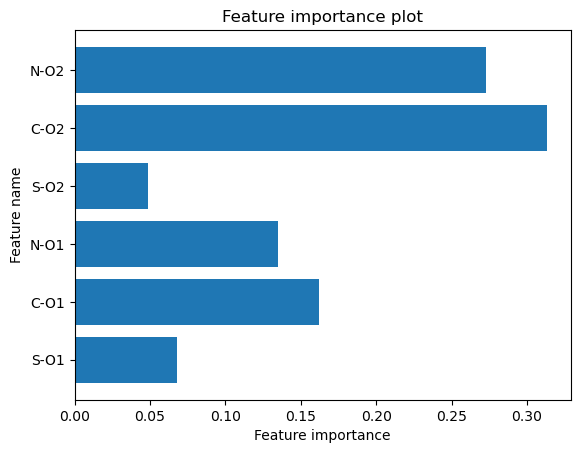

In [3]:
# RandomForest classifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)

# 3 features
rf.fit(X3_train, y3_train)

print("Number of features seen in the fit: ",rf.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(rf.feature_names_in_,rf.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RandomForest for 3 features: ", rf.score(X3_train, y3_train))
print("Test accuracy for RandomForest for 3 features: ", rf.score(X3_test, y3_test))

# 6 features

rf.fit(X6_train, y6_train)

print("\nNumber of features seen in the fit: ",rf.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(rf.feature_names_in_,rf.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RandomForest for 6 features: ", rf.score(X6_train, y6_train))
print("Test accuracy for RandomForest for 6 features: ", rf.score(X6_test, y6_test))

my_utils.plot_feature_importance(rf, rf.feature_names_in_)


### Much better, but since there are several parameters to optimize, we introduce a new function here: 
## [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [4]:
from sklearn.model_selection import GridSearchCV

#Select the model
rf_clf = RandomForestClassifier(random_state=0)

#Choose the parameters to optimize in a dict
grid_values = {'n_estimators' : [5,10,15,20,30,40,50],
               'max_depth' : [2,3,4,5,6,7,8,9,10],
               'max_features' : ['auto', 'sqrt', 'log2']}

# Define the grid search object and fit it
grid_clf = GridSearchCV(rf_clf, param_grid=grid_values, cv=5, return_train_score=True).fit(X6_train, y6_train)

Let's go step by step on what happened here, 
1. We defined a classifier/model and grid_values dictionary which contains the parameters we'd like to see optimized. 
2. We called the GridSearchCV function and provided several parameters,
- The model
- The grid values 
- The cross-validation splitting
- return_train_score values which includes the train_score in output and lets us know if the model is overfitted

This is one of the better ways of evaluating and optimizing the hyperparameters of a model.

In [5]:
# Now for the cross validation results,
cv_scores = pd.DataFrame(grid_clf.cv_results_)

# Shape of the df, 189 = len(n_estimators) * len(max_depth) * len(max_features)
print("Shape of the cv_scores dataframe: ", cv_scores.shape)

# Best estimator
print("Best estimator: ", grid_clf.best_estimator_)

# Mean cross-validated score of the best estimator
print("Score of the best estimator: ", grid_clf.best_score_)

# Best index of the cv_scores dict
print("Best index: ", grid_clf.best_index_)

print("Raw data for the best parameter,")
print(cv_scores.iloc[87])

print("Parameters,")
print(cv_scores.iloc[87]['params'])

Shape of the cv_scores dataframe:  (189, 23)
Best estimator:  RandomForestClassifier(max_depth=6, n_estimators=20, random_state=0)
Score of the best estimator:  0.933921302578019
Best index:  87
Raw data for the best parameter,
mean_fit_time                                                  0.027604
std_fit_time                                                   0.000076
mean_score_time                                                0.004295
std_score_time                                                 0.000012
param_max_depth                                                       6
param_max_features                                                 auto
param_n_estimators                                                   20
params                {'max_depth': 6, 'max_features': 'auto', 'n_es...
split0_test_score                                              0.940299
split1_test_score                                              0.895522
split2_test_score                                   

### Using GridSearchCV is an expensive process, but necessary since we do not want to optimize these hyperparameters by hand. 

Next, we try using these parameters for the H dataset (only for the 6 feature dataset) and observe the results

Number of features seen in the fit:  6
Feature names and weights:
 [('C-H2', 0.3859821272859875), ('N-H2', 0.233170291129638), ('C-H1', 0.20725547855094403), ('S-H1', 0.06567395212646515), ('N-H1', 0.05649129981811718), ('S-H2', 0.05142685108884818)]
Training accuracy for RF :  0.987987987987988
Test accuracy for RF:  0.9166666666666666


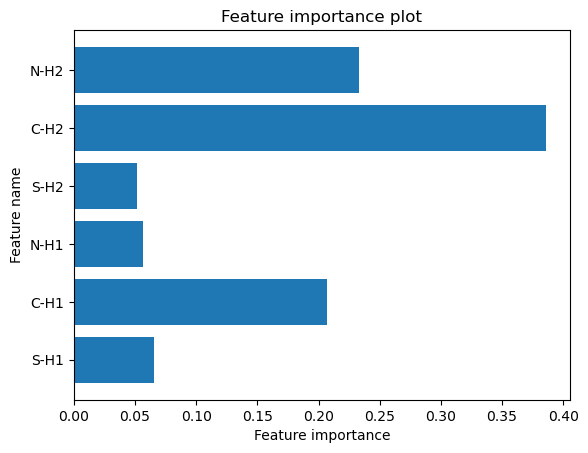

In [6]:
# Train test split
X3_train, X3_test, y3_train, y3_test = train_test_split(H3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(H6, y, test_size=0.20, random_state=0)

# Define the DecisionTree
rf = RandomForestClassifier(random_state=0, max_depth=6, max_features='auto', n_estimators=20)

# 3 feature model 
rf.fit(X6_train, y6_train)

print("Number of features seen in the fit: ",rf.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(rf.feature_names_in_,rf.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RF : ", rf.score(X6_train, y6_train))
print("Test accuracy for RF: ", rf.score(X6_test, y6_test))

my_utils.plot_feature_importance(rf, rf.feature_names_in_)

### Not bad but since this is an ensemble random tree, we can use all 12 features.

First we will use the parameters from above but then we will perform another grid search to determine if the best parameters change.  

In [7]:
# Use the full dataset (12 features) for training, y remains the same
X = df_shuffle.iloc[:,2:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

rf = RandomForestClassifier(random_state=0, max_depth=6, max_features='auto', n_estimators=20)
rf.fit(X_train, y_train)

print("Number of features seen in the fit: ",rf.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(rf.feature_names_in_,rf.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RF with 12 features: ", rf.score(X_train, y_train))
print("Test accuracy for RF with 12 features: ", rf.score(X_test, y_test))

Number of features seen in the fit:  12
Feature names and weights:
 [('C-H2', 0.28306248750620927), ('C-O2', 0.2314972620136307), ('C-H1', 0.11773533352356977), ('N-O2', 0.09491935387191283), ('S-O1', 0.058967541419526745), ('C-O1', 0.03838120272487525), ('N-H2', 0.038349840216508335), ('N-O1', 0.03422319156753249), ('S-H1', 0.02834130464964984), ('S-O2', 0.027086962690480165), ('N-H1', 0.025475356533657123), ('S-H2', 0.021960163282447476)]
Training accuracy for RF with 12 features:  0.990990990990991
Test accuracy for RF with 12 features:  0.9404761904761905


In [8]:
# Another gridsearch 

rf_clf = RandomForestClassifier(random_state=0)

#Choose the parameters to optimize in a dict
grid_values = {'n_estimators' : [5,10,15,20,30,40,50],
               'max_depth' : [2,3,4,5,6,7,8,9,10]}

# Define the grid search object and fit it
grid_clf = GridSearchCV(rf_clf, param_grid=grid_values, cv=5, return_train_score=True).fit(X_train, y_train)

# Now for the cross validation results,
cv_scores = pd.DataFrame(grid_clf.cv_results_)

# Shape of the df = len(n_estimators) * len(max_depth) * len(max_features)
print("Shape of the cv_scores dataframe: ", cv_scores.shape)

# Best estimator
print("Best estimator: ", grid_clf.best_estimator_)

# Mean cross-validated score of the best estimator
print("Score of the best estimator: ", grid_clf.best_score_)

# Best index of the cv_scores dict
print("Best index: ", grid_clf.best_index_)

print("Raw data for the best parameter,")
print(cv_scores.iloc[int(grid_clf.best_index_)])

print("Parameters,")
print(cv_scores.iloc[int(grid_clf.best_index_)]['params'])

Shape of the cv_scores dataframe:  (63, 22)
Best estimator:  RandomForestClassifier(max_depth=4, n_estimators=10, random_state=0)
Score of the best estimator:  0.9307553143374039
Best index:  15
Raw data for the best parameter,
mean_fit_time                                     0.015319
std_fit_time                                      0.000108
mean_score_time                                   0.003088
std_score_time                                    0.000006
param_max_depth                                          4
param_n_estimators                                      10
params                {'max_depth': 4, 'n_estimators': 10}
split0_test_score                                 0.970149
split1_test_score                                 0.910448
split2_test_score                                 0.970149
split3_test_score                                 0.893939
split4_test_score                                 0.909091
mean_test_score                                   0.930755
std_t

The n_estimators reduces from 20 to 10 and max_depth also reduces from 6 to 4. The model also doesn't seem too overfit, so, finally we run the classifier using these parameters and plot the decision weights. 

Number of features seen in the fit:  12
Feature names and weights:
 [('C-H2', 0.34187166585115275), ('C-O2', 0.16797556007284495), ('N-O2', 0.1288172495934314), ('C-H1', 0.08582053342058495), ('C-O1', 0.06438743848008886), ('S-O2', 0.055581397028257595), ('N-O1', 0.037055941779575434), ('N-H1', 0.0359974334040123), ('S-O1', 0.03521984195359279), ('S-H2', 0.016034610540615887), ('N-H2', 0.015737252176254716), ('S-H1', 0.015501075699588569)]
Training accuracy for RF with 12 features:  0.960960960960961
Test accuracy for RF with 12 features:  0.9404761904761905


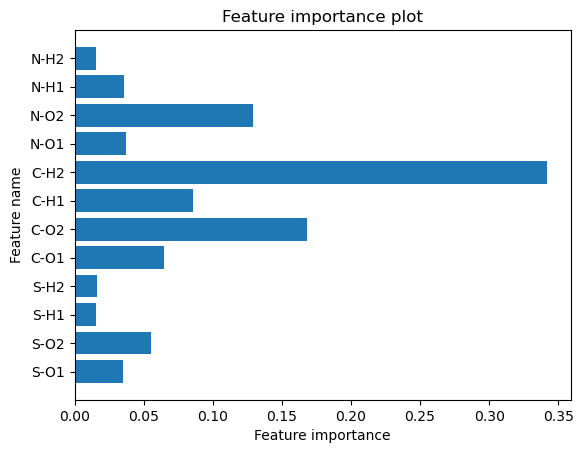

In [9]:
# Classifier using the above parameter
#import my_utils

rf = RandomForestClassifier(random_state=0, max_depth=4, max_features='auto', n_estimators=10).fit(X_train, y_train)

print("Number of features seen in the fit: ",rf.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(rf.feature_names_in_,rf.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RF with 12 features: ", rf.score(X_train, y_train))
print("Test accuracy for RF with 12 features: ", rf.score(X_test, y_test))

my_utils.plot_feature_importance(rf, rf.feature_names_in_)

### Comparing this plot to the plot for the decision tree we see several similarities and differences,
1. The C-H2 feature still holds the highest weight in the classification, followed by C-O2 and N-O2. This was not the case in the decision tree where C-H2 dominated over all other features.

2. No feature in random forest has zero weight, which is reasonable since we are using several decision trees in this model. 

## Gradient Boosted Decision Trees

This model uses several shallow trees, known as weak learners, for classification. The following are the important parameters to consider,

1. learning_rate: It controls how hard each new tree tries to correct the mistakes of the previous tree. High learning rate means complex trees and low rate means simpler trees
2. n_estimators: Number of boosting stages to perform
3. min_samples_split: Minimum number of samples required to split a node 
4. max_depth: Maximum depth of individual decision trees used 
5. validation_fraction: The proportion of training data to set aside as validation set for early stopping

Learning rate is the most important (new) parameter to consider here. 

We will not repeat calculations for the O and H datasets but use all 12 features with default values and then perform a gridsearch to determine the best values.

Number of features seen in the fit:  12
Feature names and weights:
 [('C-H2', 0.6167897539023556), ('N-O2', 0.0896172571202324), ('C-H1', 0.07746791302893696), ('S-O1', 0.06316185366461262), ('N-H2', 0.0575854936722011), ('C-O2', 0.03329421225877453), ('N-O1', 0.02301059776214095), ('S-O2', 0.015187824282281936), ('N-H1', 0.00827911550441008), ('C-O1', 0.007616459602470495), ('S-H1', 0.0063202029003939265), ('S-H2', 0.0016693163011894357)]
Training accuracy for RF with 12 features:  1.0
Test accuracy for RF with 12 features:  0.9642857142857143


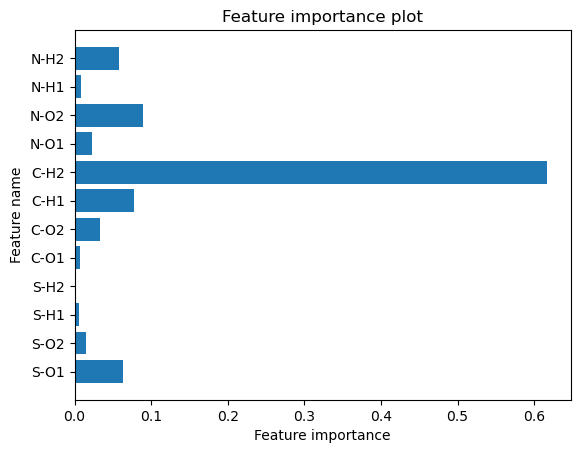

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Default classfier
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

print("Number of features seen in the fit: ",gbc.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(gbc.feature_names_in_,gbc.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RF with 12 features: ", gbc.score(X_train, y_train))
print("Test accuracy for RF with 12 features: ", gbc.score(X_test, y_test))

my_utils.plot_feature_importance(gbc, gbc.feature_names_in_)

In [11]:
# Now the gridsearch 
gbc_clf = GradientBoostingClassifier(random_state=0)

# Parameter grid
grid_values = {'learning_rate' : [0.001, 0.01, 0.1, 0.25, 0.5, 1.0],
              'n_estimators' : [5, 10, 15, 20, 25, 30],
              'max_depth' : [1, 2, 3, 4, 5, 6],
              'min_samples_split' : [2, 4, 6, 8, 10, 12]}

# Define the grid search object and fit it
grid_clf = GridSearchCV(gbc_clf, param_grid=grid_values, cv=5, return_train_score=True).fit(X_train, y_train)

# Now for the cross validation results,
cv_scores = pd.DataFrame(grid_clf.cv_results_)

# Shape of the df = len(n_estimators) * len(max_depth) * len(max_features)
print("Shape of the cv_scores dataframe: ", cv_scores.shape)

# Best estimator
print("Best estimator: ", grid_clf.best_estimator_)

# Mean cross-validated score of the best estimator
print("Score of the best estimator: ", grid_clf.best_score_)

# Best index of the cv_scores dict
print("Best index: ", grid_clf.best_index_)

print("Raw data for the best parameter,")
print(cv_scores.iloc[int(grid_clf.best_index_)])

print("Parameters,")
print(cv_scores.iloc[int(grid_clf.best_index_)]['params'])

Shape of the cv_scores dataframe:  (1296, 24)
Best estimator:  GradientBoostingClassifier(learning_rate=0.25, min_samples_split=8,
                           n_estimators=25, random_state=0)
Score of the best estimator:  0.9368159203980099
Best index:  742
Raw data for the best parameter,
mean_fit_time                                                       0.029949
std_fit_time                                                        0.000053
mean_score_time                                                     0.001717
std_score_time                                                      0.000011
param_learning_rate                                                     0.25
param_max_depth                                                            3
param_min_samples_split                                                    8
param_n_estimators                                                        25
params                     {'learning_rate': 0.25, 'max_depth': 3, 'min_s...
split0_test_score

### This seems overfit but the high cross-validation score indicates that the overfitting is not as bad.  

Number of features seen in the fit:  12
Feature names and weights:
 [('C-H2', 0.6327736050851653), ('N-O2', 0.0801985172407898), ('C-H1', 0.07934266494067273), ('S-O1', 0.06298496057707198), ('N-H2', 0.05169383041614889), ('N-O1', 0.02496901163814307), ('C-O2', 0.022735322332624527), ('S-O2', 0.019105243256204947), ('N-H1', 0.01359158842610054), ('C-O1', 0.008493287239636892), ('S-H1', 0.0031060137893963295), ('S-H2', 0.0010059550580448706)]
Training accuracy for RF with 12 features:  1.0
Test accuracy for RF with 12 features:  0.9642857142857143


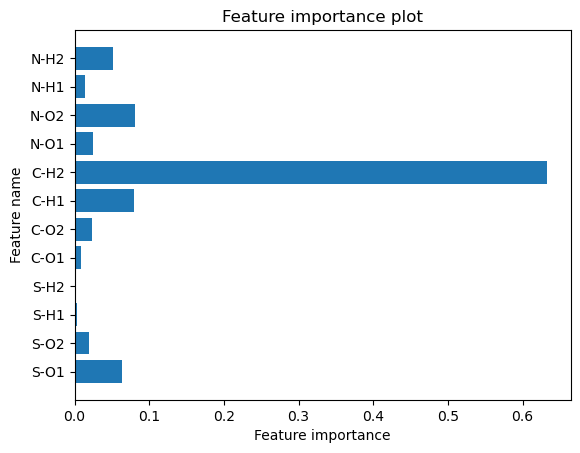

In [12]:
# Classfier with best parameters
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.25, max_depth=3, min_samples_split=8, n_estimators=25).fit(X_train, y_train)

print("Number of features seen in the fit: ",gbc.n_features_in_)
print("Feature names and weights:\n",sorted(list(zip(gbc.feature_names_in_,gbc.feature_importances_.flatten())), key=lambda x:x[1], reverse=True))
print("Training accuracy for RF with 12 features: ", gbc.score(X_train, y_train))
print("Test accuracy for RF with 12 features: ", gbc.score(X_test, y_test))

my_utils.plot_feature_importance(gbc, gbc.feature_names_in_)

### Compared to RandomForest, this model's feature weights are dominated by C-H2, and some weights are negligible. A very high dependance on a single feature can be prevented by regularization or better learning parameters. 

However, this also means we need to increase our dataset and play with other parameters. 